In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Gas Prices

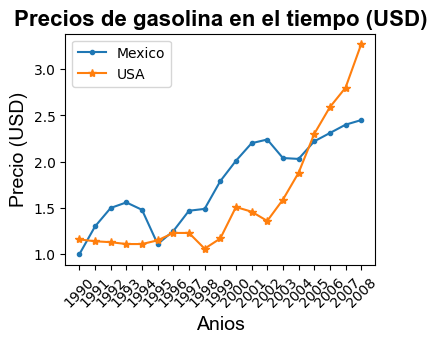

In [20]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(4,3))

plt.plot(gas['Year'], gas['Mexico'], '.-',label='Mexico')
plt.plot(gas.Year, gas.USA, '*-', label='USA')

plt.title('Precios de gasolina en el tiempo (USD)', fontdict={'fontname':'Arial', 'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Anios', fontdict={'fontname':'Arial', 'fontsize':14})
plt.ylabel('Precio (USD)', fontdict={'fontname':'Arial', 'fontsize':14})
plt.legend()

plt.xticks(gas['Year'], rotation=45)

#plt.savefig('gasprices.png', dpi=500)

plt.show()

### FIFA data

In [21]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


[ 40  50  60  70  80  90 100]


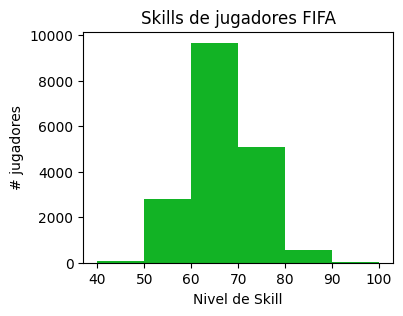

In [29]:
# Histograma

bins = np.arange(40, 110, 10)
print(bins)

plt.figure(figsize=(4,3))

plt.xticks(bins)

plt.hist(fifa.Overall, bins=bins, color='#12b325')

plt.title('Skills de jugadores FIFA')
plt.ylabel('# jugadores')
plt.xlabel('Nivel de Skill')

plt.show()

4211
13948


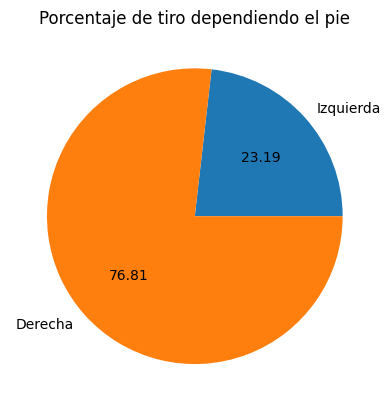

In [37]:
# Pie Chart

izq = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
print(izq)
der = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
print(der)

values = [izq, der]
label = ['Izquierda', 'Derecha']

plt.pie(values, labels=label, autopct='%.2f')

plt.title('Porcentaje de tiro dependiendo el pie')

plt.show()

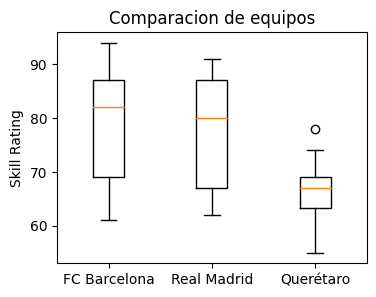

Outlier de Queretaro: [78]
803    Tiago Volpi
Name: Name, dtype: object


In [44]:
# Boxplots

plt.figure(figsize=(4,3))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
queretaro = fifa.loc[fifa.Club == 'Querétaro']['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'Querétaro']

boxplot = plt.boxplot([barcelona, madrid, queretaro], labels=labels)

plt.title('Comparacion de equipos')
plt.ylabel('Skill Rating')

plt.show()

atipico = boxplot['fliers'][2].get_ydata()
print('Outlier de Queretaro:', atipico)

jugador_atipico = fifa.loc[(fifa['Overall']==int(atipico)) & (fifa['Club']=='Querétaro')]
print(jugador_atipico.Name)